In [1]:
import numpy as np
import pandas as pd
import folium
import json
from geopy.geocoders import Nominatim
import requests
import re
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from math import radians, cos, sin, asin, sqrt 
import time
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("Chennai_Clustered.csv")

In [3]:
data=data.drop('Unnamed: 0',axis=1)
data

,Location,Latitude,Longitude,Cluster,Distance
0,Kazhipattur,12.823581,80.231043,3,0
1,Vandalur,12.891606,80.084974,3,0
2,Sithalapakkam,12.891705,80.185113,3,0
3,Perumbakkam,12.892316,80.188892,3,0
4,Mudichur,12.905405,80.067579,3,0
...,...,...,...,...,...
155,Kattivakkam,13.216133,80.318177,2,0
156,Kattivakkam,13.216133,80.318177,2,0
157,Ennore,13.217468,80.321601,2,0
158,Sholavaram,13.238777,80.162218,2,0


# Marking All locations in Map

In [4]:
address='Chennai'

geolocator=Nominatim()
location=geolocator.geocode(address)
che_lat=location.latitude
che_lon=location.longitude

In [5]:
che_lat

13.0836939

In [6]:
def plot_map(data,clusters):

    map_chennai=folium.Map(location=[che_lat,che_lon],zoom_start=10)
    color = ['red','blue','white','yellow','gold','aqua','azure','black']
    
    for lat,lng,loc,cluster in zip(data['Latitude'],data['Longitude'],data['Location'],data['Cluster']):
        label='{}-{}'.format(loc,cluster)
        label=folium.Popup(label,parse_html=True)
        folium.CircleMarker(
        location=[lat,lng],
        radius=5,
        color='black',
        popup=label,
        fill=True,
        fill_color=color[cluster],
        fill_opacity=0.7,
        ).add_to(map_chennai)
    return map_chennai

In [7]:
map_chennai=folium.Map(location=[che_lat,che_lon],zoom_start=10)
#color=['red','blue','yellow']
for lat,lng,loc in zip(data['Latitude'],data['Longitude'],data['Location']):
    label='{}-{},{}'.format(loc,lat,lng)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    location=[lat,lng],
    radius=5,
    color='red',
    popup=label,
    fill=True,
    fill_opacity=1,
    parse_html=True
    ).add_to(map_chennai)
    
map_chennai

### Choosing Best 'K' Value

In [8]:
if(data.columns.shape[0]>3):
    chennai_cluster=data.drop(['Location','Cluster','Distance'],axis=1)
else:
    chennai_cluster=data.drop('Location',axis=1)
inertia=[]
distortion=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,random_state=0).fit(chennai_cluster)
    inertia.append(kmeans.inertia_)
    distortion.append(sum(np.min(cdist(chennai_cluster, kmeans.cluster_centers_, 
                 'euclidean'),axis=1)) / chennai_cluster.shape[0])
    
    

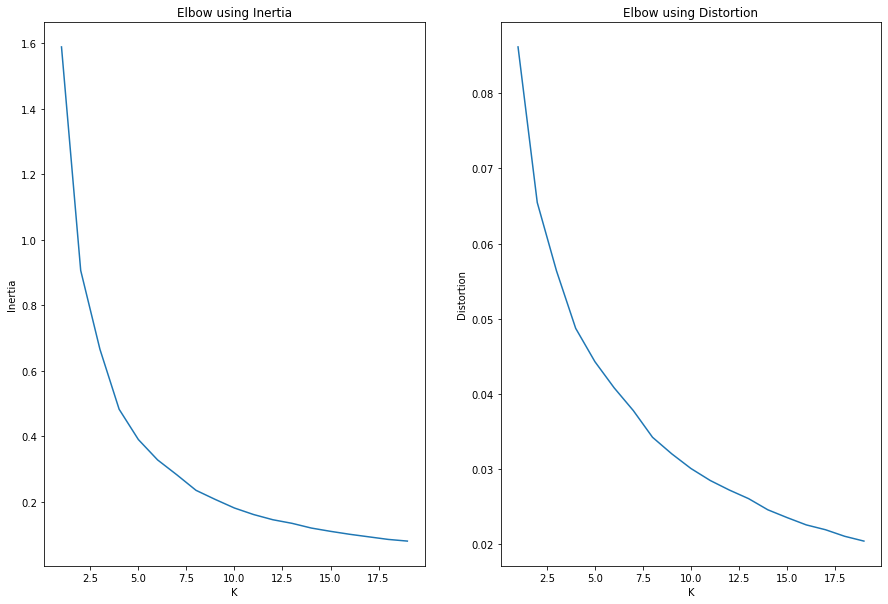

<Figure size 432x288 with 0 Axes>

In [9]:
fig=plt.Figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(range(1,20),inertia)
ax2.plot(range(1,20),distortion)
ax1.set_title('Elbow using Inertia')
ax2.set_title('Elbow using Distortion')
ax1.set_xlabel('K')
ax1.set_ylabel('Inertia')
ax2.set_xlabel('K')
ax2.set_ylabel('Distortion')
plt.tight_layout("best")
fig

## Plotting Chennai Map based on cluster

### Clustering the Map

In [10]:
data.columns.shape[0]

5

In [11]:
n_clusters=8
if(data.columns.shape[0]>3):
    kmeans=KMeans(n_clusters,random_state=5,max_iter=3000).fit(data.drop(['Location','Distance','Cluster'],axis=1))
else:
    kmeans=KMeans(n_clusters,random_state=5,max_iter=3000).fit(data.drop(['Location'],axis=1))
kmeans.labels_

array([6, 3, 6, 6, 3, 3, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 6, 6, 3, 6, 6, 6,
       6, 6, 6, 3, 1, 1, 3, 6, 1, 6, 1, 7, 1, 1, 1, 7, 1, 3, 7, 1, 3, 1,
       7, 7, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       7, 7, 1, 7, 7, 1, 7, 7, 1, 1, 7, 7, 4, 1, 7, 1, 1, 7, 4, 7, 7, 7,
       4, 7, 7, 4, 1, 4, 4, 4, 7, 4, 7, 4, 4, 0, 7, 4, 5, 4, 4, 4, 0, 0,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4,
       0, 5, 5, 4, 5, 4, 4, 0, 5, 4, 0, 0, 0, 0, 5, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2])

In [12]:
kmeans.cluster_centers_

array([[13.12752381, 80.20169988],
       [13.01641714, 80.2336801 ],
       [13.20503214, 80.29833884],
       [12.93609955, 80.11310487],
       [13.08820106, 80.26514614],
       [13.11775618, 80.06496903],
       [12.93039257, 80.20806369],
       [13.03686977, 80.16217525]])

In [13]:
data['Cluster']=kmeans.labels_

In [14]:
def distance(lat1, lat2, lon1, lon2):  
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r)

In [15]:
def compute_dist(lat,lon,cluster):
    lat1,lon1,lat2,lon2=lat,lon,kmeans.cluster_centers_[cluster][0],kmeans.cluster_centers_[cluster][1]
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
    #print(diff_2**2+diff_1**2)
    return (c * r)

In [16]:
def compute_dist(lat,lon,cluster):
    lat1,lon1,lat2,lon2=lat,lon,kmeans.cluster_centers_[cluster][0],kmeans.cluster_centers_[cluster][1]
    diff_1=kmeans.cluster_centers_[cluster][0]-lat
    diff_2=kmeans.cluster_centers_[cluster][1]-lon
    #print(diff_2**2+diff_1**2)
    return math.sqrt(diff_1**2+diff_2**2)

In [17]:
print(compute_dist(1,2,2))

79.24388098894052


In [18]:
data['Distance']=0.0#chennai.apply(compute_dist(chennai['Latitude'],chennai['Longitude'],chennai['Cluster']))

In [19]:
for i in range(len(data)):
    data['Distance'][i]=compute_dist(data['Latitude'][i],data['Longitude'][i],data['Cluster'][i])

In [20]:
data

,Location,Latitude,Longitude,Cluster,Distance
0,Kazhipattur,12.823581,80.231043,6,0.109255
1,Vandalur,12.891606,80.084974,3,0.052640
2,Sithalapakkam,12.891705,80.185113,6,0.044983
3,Perumbakkam,12.892316,80.188892,6,0.042631
4,Mudichur,12.905405,80.067579,3,0.054907
...,...,...,...,...,...
155,Kattivakkam,13.216133,80.318177,2,0.022733
156,Kattivakkam,13.216133,80.318177,2,0.022733
157,Ennore,13.217468,80.321601,2,0.026378
158,Sholavaram,13.238777,80.162218,0,0.118052


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

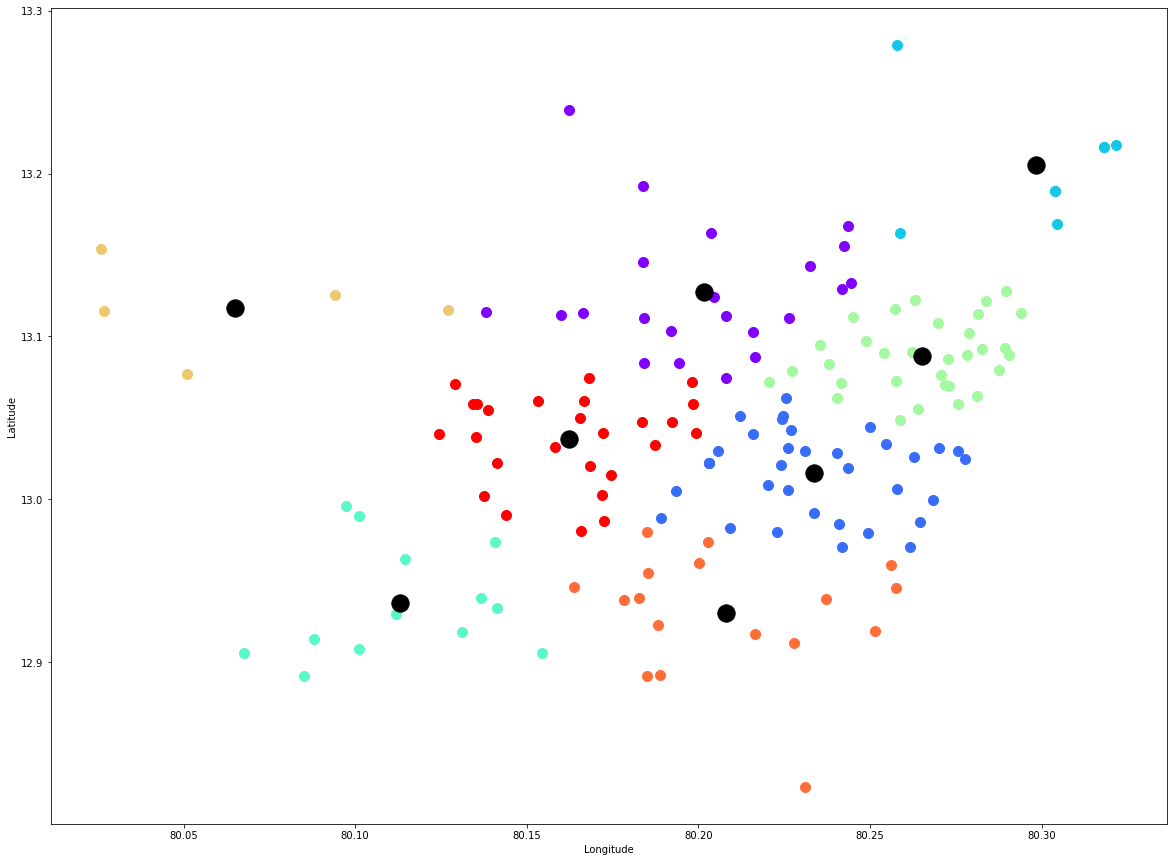

In [21]:
plt.figure(figsize=(20,15))
#color=['red','blue','green','black','orange','violet','indigo','brown']
color = cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(0,kmeans.cluster_centers_.shape[0]):
    plt.scatter(data[data['Cluster']==i]['Longitude'],data[data['Cluster']==i]['Latitude'],c=color[i],s=100)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],c='black',s=300)
#for i in range(0,len(data)):
  #   plt.text(data['Longitude'][i],data['Latitude'][i],s=data['Location'][i],size=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [22]:
plot_map(data,n_clusters)

### Define Foursquare Credientials

In [23]:
CLIENT_ID = 'CDC0BC1OFLXFNDMO44XMF3GFZCCOZDUIUD5W0S2KYCZMHHKN' # your Foursquare ID
CLIENT_SECRET = 'PTYI2XEMPZRKGIQPVHIWVOOGOJ4ZXBTAOEVS1YZ4L1GAK5P5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CDC0BC1OFLXFNDMO44XMF3GFZCCOZDUIUD5W0S2KYCZMHHKN
CLIENT_SECRET:PTYI2XEMPZRKGIQPVHIWVOOGOJ4ZXBTAOEVS1YZ4L1GAK5P5


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
data['Location'].value_counts(ascending=False)

Ekkaduthangal      2
Kattivakkam        2
Eranavur           2
Velappanchavadi    2
Thirumangalam      1
                  ..
Ayanavaram         1
Kottivakkam        1
Ramavaram          1
Perungudi          1
Park Town          1
Name: Location, Length: 156, dtype: int64

In [26]:
data.index=range(len(data))

In [27]:
chennai_venues = getNearbyVenues(names = data['Location'],
                                 latitudes = data['Latitude'],
                                 longitudes = data['Longitude']
                                 )

print(chennai_venues.shape)
chennai_venues.head()

Kazhipattur
Vandalur
Sithalapakkam
Perumbakkam
Mudichur
Madambakkam
Peerkankaranai
Karapakkam
Perungalathur
Sholinganallur
Selaiyur
Injambakkam
Medavakkam
Tambaram
Pallikaranai
Chitlapakkam
Nanmangalam
Thuraipakkam
Chrompet
Kovilambakkam
Neelankarai
Nemilichery
Keelkattalai
Palavakkam
Madipakkam
Thiruneermalai
Kottivakkam
Perungudi
Pammal
Puzhuthivakkam/ Ullagaram
MGR Nagar
Nanganallur
Velachery
Tirusulam
Adambakkam
Tharamani
Thiruvanmiyur
Meenambakkam
Pazhavanthangal
Pallavaram
Pozhichalur
IIT Madras
Kundrathur
Besant Nagar
Gerugambakkam
Alandur
St.Thomas Mount
Raj Bhavan
Adyar
Guindy
Manapakkam
Kotturpuram
Mugalivakkam
Saidapet
Moulivakkam
Ekkaduthangal
Ekkaduthangal
Purasaiwalkam
Foreshore Estate
Mandaveli
Nandanam
T. Nagar
Santhome
Jafferkhanpet
Mylapore
Ramavaram
Porur
Nesapakkam
Alwarpet
Iyyapanthangal
Kattupakkam
Ashok Nagar
K.K. Nagar
Valasaravakkam
West Mambalam
Teynampet
Alwarthirunagar
Virugambakkam
Gopalapuram
Kodambakkam
Alapakkam
Vadapalani
United India Colony
Noombal
Roy

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kazhipattur,12.823581,80.231043,Kazhipattur bus stop,12.820894,80.230310,Bus Station
1,Kazhipattur,12.823581,80.231043,Inzy gardens,12.827890,80.230997,Asian Restaurant
2,Vandalur,12.891606,80.084974,Vandalur Railway Station,12.890973,80.084662,Platform
3,Vandalur,12.891606,80.084974,Brown House Restaurant,12.890035,80.084710,Restaurant
4,Vandalur,12.891606,80.084974,Axis Bank ATM,12.893564,80.081053,ATM


In [28]:
#chennai_venues.to_csv("Chennai_venues.csv")
chennai_venues=pd.read_csv("Chennai_Venues.csv")
chennai_venues=chennai_venues.drop('Unnamed: 0',axis=1)
chennai_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kazhipattur,12.823581,80.231043,Kazhipattur bus stop,12.820894,80.230310,Bus Station
1,Kazhipattur,12.823581,80.231043,Inzy gardens,12.827890,80.230997,Asian Restaurant
2,Vandalur,12.891606,80.084974,Vandalur Railway Station,12.890973,80.084662,Platform
3,Vandalur,12.891606,80.084974,Brown House Restaurant,12.890035,80.084710,Restaurant
4,Vandalur,12.891606,80.084974,Axis Bank ATM,12.893564,80.081053,ATM
...,...,...,...,...,...,...,...
841,Ennore,13.217468,80.321601,darron wood carving works,13.219099,80.320251,Art Gallery
842,Minjur,13.278615,80.257767,Tamilnadu bakery,13.278587,80.260003,Bakery
843,Minjur,13.278615,80.257767,Saravana Medicals,13.278257,80.260070,Pharmacy
844,Minjur,13.278615,80.257767,Minjur,13.277504,80.260111,Scenic Lookout


In [31]:
chennai_venues['Venue Category'].sort_values().unique()

array(['ATM', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'Airport Food Court',
       'Airport Lounge', 'Airport Service', 'Antique Shop', 'Arcade',
       'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant',
       'Athletics & Sports', 'BBQ Joint', 'Badminton Court', 'Bakery',
       'Bank', 'Bar', 'Beach', 'Bike Rental / Bike Share', 'Bistro',
       'Bookstore', 'Boutique', 'Bowling Alley', 'Burger Joint',
       'Bus Station', 'Bus Stop', 'Cafeteria', 'Café', 'Campground',
       'Chettinad Restaurant', 'Chinese Restaurant', 'Church',
       'Clothing Store', 'Coffee Shop', 'College Library', 'Concert Hall',
       'Construction & Landscaping', 'Convenience Store',
       'Cosmetics Shop', 'Cricket Ground', 'Cupcake Shop', 'Daycare',
       'Deli / Bodega', 'Department Store', 'Dessert Shop', 'Diner',
       'Donut Shop', 'Electronics Store', 'Event Space', 'Farmers Market',
       'Fast Food Restaurant', 'Flea Market', 'Flower Shop', 'F

In [32]:
Bakery=[ 'Frozen Yogurt Shop','Sandwich Place', 'Bakery', 'Cupcake Shop', 'Dessert Shop','Ice Cream Shop','Burger Joint', 'Donut Shop', 'Snack Place']
Coffee_shops=[ 'Cafeteria', 'Café', 'Coffee Shop','Food & Drink Shop', 'Juice Bar',  'Tea Room']
Hotel=[ 'Afghan Restaurant','African Restaurant','Airport Food Court','Asian Restaurant','BBQ Joint','Chettinad Restaurant', 'Chinese Restaurant','Fried Chicken Joint','Halal Restaurant', 'Hotel','Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant','Molecular Gastronomy Restaurant', 'Motel', 'Multicuisine Indian Restaurant','New American Restaurant','North Indian Restaurant', 'Rajasthani Restaurant', 'Restaurant', 'Russian Restaurant', 'Seafood Restaurant', 'South Indian Restaurant',
       'Food','Diner','Southern / Soul Food Restaurant',  'Pizza Place','Resort', 'Mexican Restaurant', 'Middle Eastern Restaurant','Food Court', 'Food Service',  'Hotel Bar', 'Food Truck','Fast Food Restaurant', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant' ]
Bar=['Rock Club','Bar',  'Liquor Store', 'Nightclub', 'Pub','Whisky Bar', 'Smoke Shop']
Sports=[ 'Playground', 'Athletics & Sports','Cricket Ground','Badminton Court','Golf Course', 'Bowling Alley','Campground','Sports Bar','Sports Club']
Groceries=[ 'Convenience Store', 'Department Store',  'Supermarket', 'Grocery Store',  'Organic Grocery',]
Gym=['Gym', 'Gym / Fitness Center', 'Gym Pool', 'Soccer Stadium']

In [33]:
for i,place in enumerate(chennai_venues['Venue Category']):
    if(place in Bakery):
        chennai_venues['Venue Category'][i]='Bakery'
    elif(place in Coffee_shops):
        chennai_venues['Venue Category'][i]='Coffee_shops'
    elif(place in Hotel):
        chennai_venues['Venue Category'][i]='Hotel'
    elif(place in Bar):
        chennai_venues['Venue Category'][i]='Bar'
    elif(place in Sports):
        chennai_venues['Venue Category'][i]='Sports'
    elif(place in Groceries):
        chennai_venues['Venue Category'][i]='Groceries'
    elif(place in Gym):
        chennai_venues['Venue Category'][i]='Gym'
    elif(place in ['Train','Train Station']):
        chennai_venues['Venue Category'][i]='Train'

In [34]:
chennai_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kazhipattur,12.823581,80.231043,Kazhipattur bus stop,12.820894,80.230310,Bus Station
1,Kazhipattur,12.823581,80.231043,Inzy gardens,12.827890,80.230997,Hotel
2,Vandalur,12.891606,80.084974,Vandalur Railway Station,12.890973,80.084662,Platform
3,Vandalur,12.891606,80.084974,Brown House Restaurant,12.890035,80.084710,Hotel
4,Vandalur,12.891606,80.084974,Axis Bank ATM,12.893564,80.081053,ATM
...,...,...,...,...,...,...,...
841,Ennore,13.217468,80.321601,darron wood carving works,13.219099,80.320251,Art Gallery
842,Minjur,13.278615,80.257767,Tamilnadu bakery,13.278587,80.260003,Bakery
843,Minjur,13.278615,80.257767,Saravana Medicals,13.278257,80.260070,Pharmacy
844,Minjur,13.278615,80.257767,Minjur,13.277504,80.260111,Scenic Lookout


In [35]:
chennai_venues_dummy=pd.get_dummies(chennai_venues,columns=['Venue Category'],prefix="",prefix_sep="")

In [36]:
chennai_venues_dummy=chennai_venues_dummy.groupby('Location').mean().reset_index()#.join(data['Cluster'])#,by='Location')

In [37]:
chennai_venues_dummy=chennai_venues_dummy.drop(['Location Longitude','Venue Longitude','Location Latitude','Venue Latitude'],axis=1)

In [38]:
chennai_venues_dummy

,Location,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Sports,Steakhouse,Surf Spot,Theater,Theme Park,Toy / Game Store,Train,Travel & Transport,Video Store,Women's Store
0,Adambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,Alandur,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,Alapakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,Alwarpet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Villivakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.40,0.0,0.0,0.0
134,Virugambakkam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
135,Vyasarpadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
136,Washermanpet,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
most_visited = pd.DataFrame(columns=columns)
most_visited['Location'] = chennai_venues_dummy['Location']

for ind in np.arange(chennai_venues_dummy.shape[0]):
    most_visited.iloc[ind, 1:] = return_most_common_venues(chennai_venues_dummy.iloc[ind, :], num_top_venues)

most_visited.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adambakkam,IT Services,Hotel,Bus Station,Bakery,Flea Market,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store
1,Adyar,Hotel,Coffee_shops,Bakery,Electronics Store,Shoe Store,Groceries,Lounge,Movie Theater,Bookstore,Bar
2,Alandur,Airport Service,Women's Store,Flea Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,Event Space
3,Alapakkam,Hotel,Bakery,Women's Store,Flea Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store
4,Alwarpet,Hotel,Coffee_shops,Bakery,Groceries,Men's Store,Bookstore,Bistro,Hostel,Event Space,Construction & Landscaping


In [41]:
most_visited=most_visited.join(data['Cluster'].astype('int'))

In [42]:
most_visited['Cluster']=-1
most_visited['Longitude']=-1.0
most_visited['Latitude']=-1.0


In [43]:
for i in range(len(most_visited)):
    for j in range(len(data)):
        try:
            if most_visited['Location'][i]==data['Location'][j]:
                most_visited['Cluster'][i]=data['Cluster'][j]
                most_visited['Latitude'][i]=data['Latitude'][j]
                most_visited['Longitude'][i]=data['Longitude'][j]
                break
        except:
            most_visited['Cluster'][i]=3
            most_visited['Latitude'][i]=12.97374
            most_visited['Longitude'][i]=80.1408

In [44]:
most_visited

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster,Longitude,Latitude
0,Adambakkam,IT Services,Hotel,Bus Station,Bakery,Flea Market,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,1,80.209121,12.982221
1,Adyar,Hotel,Coffee_shops,Bakery,Electronics Store,Shoe Store,Groceries,Lounge,Movie Theater,Bookstore,Bar,1,80.257779,13.006450
2,Alandur,Airport Service,Women's Store,Flea Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,Event Space,7,80.171919,13.002822
3,Alapakkam,Hotel,Bakery,Women's Store,Flea Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,7,80.165435,13.049901
4,Alwarpet,Hotel,Coffee_shops,Bakery,Groceries,Men's Store,Bookstore,Bistro,Hostel,Event Space,Construction & Landscaping,1,80.254549,13.033860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Villivakkam,Train,Hotel,Market,Bakery,Historic Site,Farmers Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,0,80.208138,13.112588
134,Virugambakkam,Hotel,Bakery,Multiplex,Movie Theater,Coffee_shops,Airport Service,Flea Market,Daycare,Airport,Accessories Store,7,80.192218,13.047543
135,Vyasarpadi,Bus Station,Bakery,Women's Store,Flea Market,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,Event Space,4,80.257124,13.116973
136,Washermanpet,ATM,Flea Market,Concert Hall,Construction & Landscaping,Cosmetics Shop,Daycare,Deli / Bodega,Electronics Store,Event Space,Farmers Market,4,80.281481,13.113630


In [45]:
chennai_venues_dummy=pd.get_dummies(chennai_venues,columns=['Venue Category'],prefix="",prefix_sep="")

In [47]:
chennai_venues_count=chennai_venues_dummy.groupby('Location').sum().reset_index()

In [49]:
chennai_venues_count

,Location,Location Latitude,Location Longitude,Venue Latitude,Venue Longitude,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,...,Sports,Steakhouse,Surf Spot,Theater,Theme Park,Toy / Game Store,Train,Travel & Transport,Video Store,Women's Store
0,Adambakkam,51.928886,320.836484,51.928328,320.827052,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,403.199950,2487.991152,403.207685,2487.937588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandur,13.002822,80.171919,12.999204,80.174433,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Alapakkam,65.249505,400.827174,65.264605,400.832811,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alwarpet,312.812645,1926.109178,312.793339,1926.089220,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Villivakkam,65.562938,401.040689,65.559527,401.040153,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
134,Virugambakkam,117.427891,721.729963,117.422788,721.731324,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,Vyasarpadi,26.233945,160.514248,26.236473,160.521003,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,Washermanpet,13.113630,80.281481,13.109830,80.280998,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
chennai_venues_count.drop(['Location Longitude','Venue Longitude','Location Latitude','Venue Latitude'],axis=1,inplace=True)

In [51]:
chennai_venues_count.iloc[0,1:].sort_values()

ATM                              0
Paper / Office Supplies Store    0
Optical Shop                     0
Music Store                      0
Museum                           0
                                ..
Flea Market                      0
Bakery                           1
Bus Station                      1
Hotel                            1
IT Services                      1
Name: 0, Length: 86, dtype: object

In [52]:
chennai_venues_count['Cluster']=-1
chennai_venues_count['Longitude']=-1.0
chennai_venues_count['Latitude']=-1.0


In [53]:
for i in range(len(chennai_venues_count)):
    for j in range(len(data)):
        try:
            if chennai_venues_count['Location'][i]==data['Location'][j]:
                chennai_venues_count['Cluster'][i]=data['Cluster'][j]
                chennai_venues_count['Latitude'][i]=data['Latitude'][j]
                chennai_venues_count['Longitude'][i]=data['Longitude'][j]
                break
        except:
            chennai_venues_count['Cluster'][i]=3
            chennai_venues_count['Latitude'][i]=12.97374
            chennai_venues_count['Longitude'][i]=80.1408

In [54]:
chennai_venues_count

,Location,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Theater,Theme Park,Toy / Game Store,Train,Travel & Transport,Video Store,Women's Store,Cluster,Longitude,Latitude
0,Adambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,80.209121,12.982221
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,80.257779,13.006450
2,Alandur,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,80.171919,13.002822
3,Alapakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,80.165435,13.049901
4,Alwarpet,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,80.254549,13.033860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Villivakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,80.208138,13.112588
134,Virugambakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,80.192218,13.047543
135,Vyasarpadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,80.257124,13.116973
136,Washermanpet,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,80.281481,13.113630


In [55]:
clustered=chennai_venues_count.groupby(['Cluster']).sum().reset_index()

In [56]:
clustered

,Cluster,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Surf Spot,Theater,Theme Park,Toy / Game Store,Train,Travel & Transport,Video Store,Women's Store,Longitude,Latitude
0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1604.071373,262.403097
1,1,1,0,0,0,0,0,1,0,0,...,1,1,0,0,4,0,0,0,2487.282700,403.529189
2,2,4,0,0,0,0,0,0,1,0,...,0,0,0,0,8,0,0,0,481.764634,79.234555
3,3,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,881.254924,142.216091
4,4,1,1,0,0,0,0,0,0,1,...,0,1,1,2,5,0,2,2,2407.972817,392.602943
5,5,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,240.285988,39.360489
6,6,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1203.192893,194.024830
7,7,1,0,1,3,1,1,0,0,0,...,0,0,0,0,4,1,0,0,1763.670535,286.837173


In [57]:
col=clustered.columns
col1=col[:-2].append(col[-2:])

In [62]:
clustered0=chennai_venues_count[chennai_venues_count['Cluster']==0]
clustered1=chennai_venues_count[chennai_venues_count['Cluster']==1]
clustered2=chennai_venues_count[chennai_venues_count['Cluster']==2]
clustered3=chennai_venues_count[chennai_venues_count['Cluster']==3]
clustered4=chennai_venues_count[chennai_venues_count['Cluster']==4]
clustered5=chennai_venues_count[chennai_venues_count['Cluster']==5]
clustered6=chennai_venues_count[chennai_venues_count['Cluster']==6]
clustered7=chennai_venues_count[chennai_venues_count['Cluster']==7]

In [63]:
clustered0

,Location,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,...,Theater,Theme Park,Toy / Game Store,Train,Travel & Transport,Video Store,Women's Store,Cluster,Longitude,Latitude
6,Ambattur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.159862,13.112886
8,Anna Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.216442,13.087200
10,Arumbakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.208131,13.074371
33,ICF,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.215810,13.102940
46,Kodungaiyur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.244477,13.132753
47,Kolathur,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.204628,13.124113
48,Korattur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.184277,13.111539
57,Madhavaram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.232517,13.142931
58,Madhavaram Milk Colony,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.242525,13.155408
65,Mathur,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80.243692,13.167864


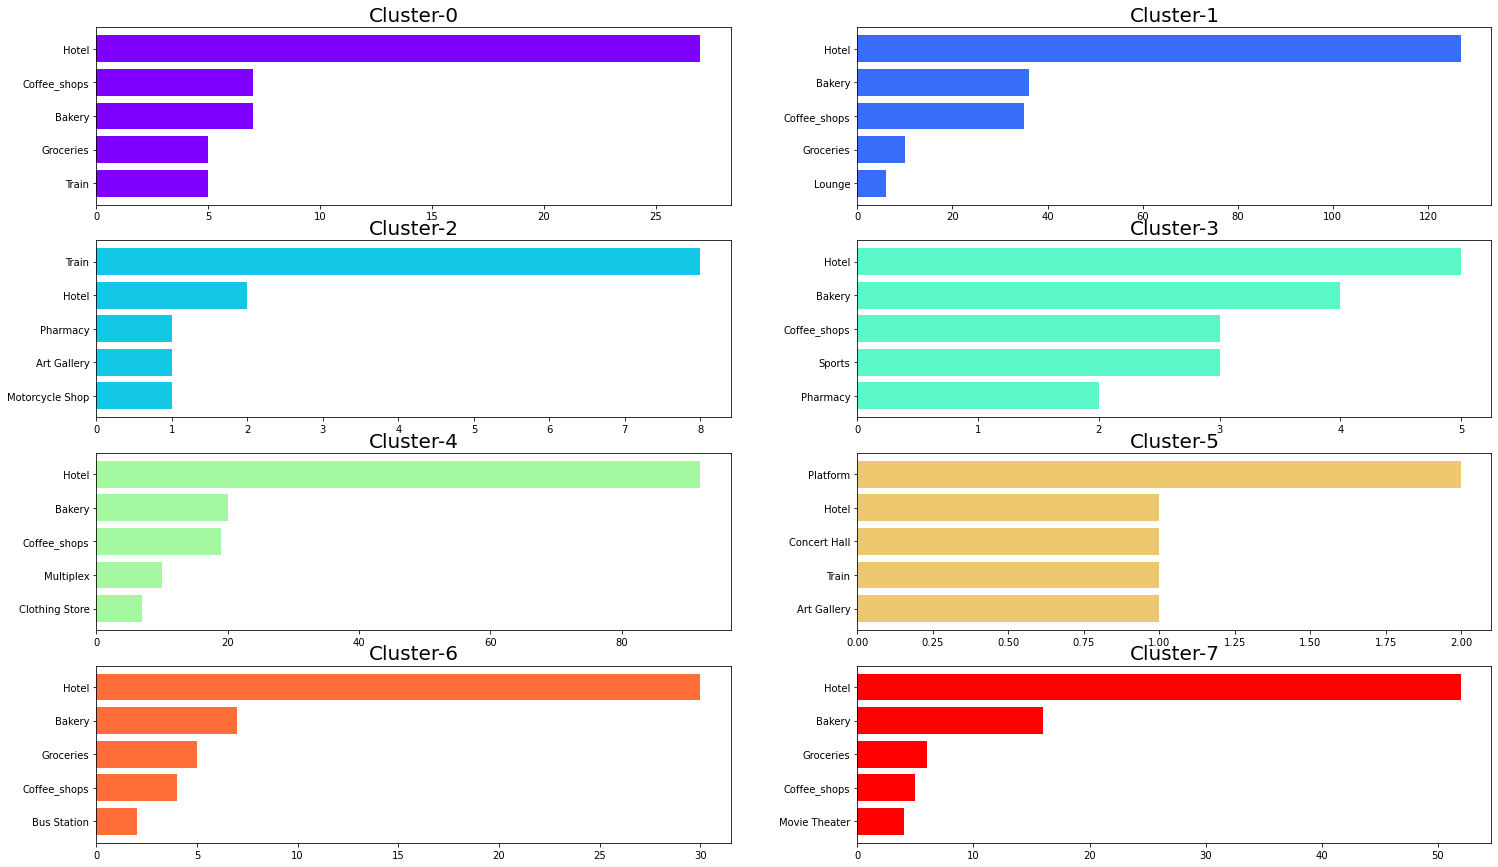

In [64]:
Fig=plt.figure(figsize=(25,15))
colors=cm.rainbow(np.linspace(0,1,n_clusters))
for i in range(n_clusters):
    ax=Fig.add_subplot(4,2,i+1)
    ax.barh(clustered.drop(['Latitude','Longitude','Cluster'],axis=1).iloc[i,1:].sort_values(ascending=False).index[:5],clustered.drop(['Latitude','Longitude','Cluster'],axis=1).iloc[i,1:].sort_values(ascending=False)[:5],color=colors[i])
    plt.title('Cluster-{}'.format(i),size=20)
    plt.gca().invert_yaxis()

    
    
    

From the above bar graph, we can able to see that Cluster-1,2,4,7 Have more than 50 Hotels. So, Those places not the right choice for Hotel

Cluster-5 is somehow outside from the center of the city. So, If the customer wants to establish their hotel in a remote place, It will be the Best Choice for them. 

Cluster-3 and 6 is in the City, But Still, It has very limited hotels. So, The customer can look for that cluster too.

Cluster-0 is in the center of city and it has variety styles of hotels. So, The customer has to think a lot in establishing in this sector

In [65]:
print("------Cluster 3 -----")
for i in range(len(clustered3)):
    print(clustered3.reset_index(drop=True)['Location'][i])
print()
print("------Cluster 6 -----")
for i in range(len(clustered6)):
    print(clustered6.reset_index(drop=True)['Location'][i])

------Cluster 3 -----
Chitlapakkam
Chrompet
Kundrathur
Madambakkam
Mudichur
Pammal
Peerkankaranai
Perungalathur
Selaiyur
Tambaram
Vandalur

------Cluster 6 -----
Injambakkam
Karapakkam
Kazhipattur
Keelkattalai
Kovilambakkam
Madipakkam
Medavakkam
Nanganallur
Neelankarai
Nemilichery
Palavakkam
Pallikaranai
Puzhuthivakkam/ Ullagaram
Sholinganallur
Thuraipakkam


In [66]:
combined=clustered3.append(clustered6)

In [67]:
plot_map(combined,2)